In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
from matplotlib.collections import LineCollection
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from scipy.linalg import svd
from numpy.linalg import norm
rng = np.random.default_rng(13)

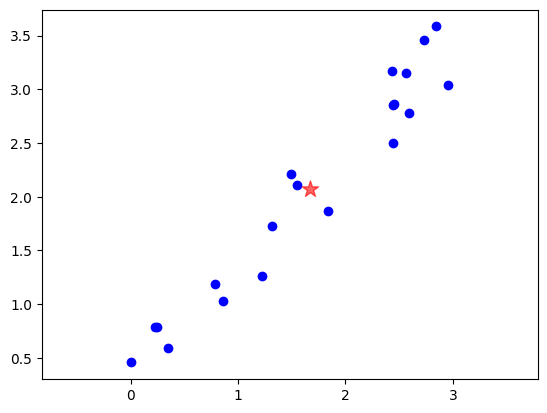

In [ ]:
x = 3 * rng.random(20)
y = x + 0.75* rng.random(20)
fig = plt.figure(); ax = plt.gca()
ax.scatter(x, y, color='b')
ax.scatter(x.mean(), y.mean(), color='r', marker='*', s=150, alpha=0.6);
ax.axis('equal');

In [ ]:
XX = np.array([x, y]).T
m, n = XX.shape

In [ ]:
X = XX - XX.mean(axis=0)

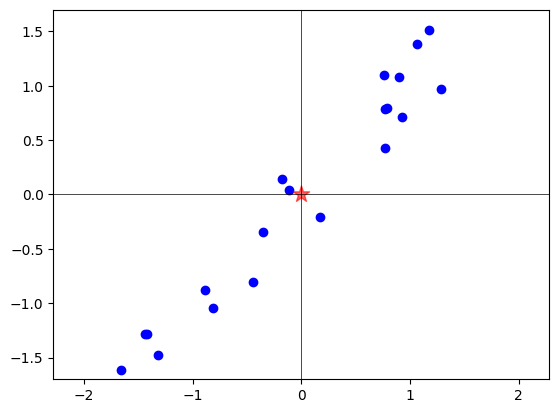

In [ ]:
def plotX(X, ax=None):
    if ax is None: fig = plt.figure(); ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], color='b')
    t = np.linspace(-3, 3, 100); o = np.zeros_like(t)
    ax.plot(t, o, 'k', o, t, 'k', linewidth=0.5);
    ax.scatter(0, 0, color='r', marker='*', s=150, alpha=0.6);
    ax.axis('equal');
    ax.set(xlim=(-1.5,1.5), ylim=(-1.7,1.7));
plotX(X);

<ipython-input-49-b9c0f1500c12>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm); plotX(X, ax)


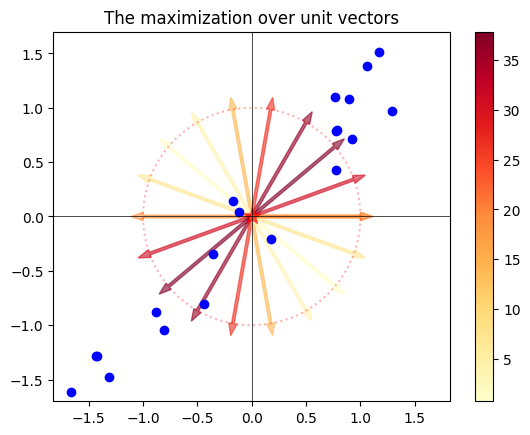

In [ ]:
fig = plt.figure();ax = plt.gca()
ax.set_title('The maximization over unit vectors')
theta = np.linspace(0, 2*np.pi, num=100) #draw unit circle
ax.plot(np.cos(theta), np.sin(theta), ':r', alpha=0.3)

theta = np.linspace(0, 2*np.pi, num=19)
v = np.array([np.cos(theta), np.sin(theta)]) # unit vectors
f = ((X @ v) ** 2).sum(axis=0) # function to maximize over v


nrm = colors.Normalize(vmin=np.min(f), vmax=np.max(f))
sm = cm.ScalarMappable(norm=nrm, cmap='YlOrRd')
for i in range(v.shape[1]):  # color vectors based on f value

    ax.arrow(0, 0, v[0, i], v[1, i], width=0.025, color=sm.to_rgba(f[i]),alpha=0.6)
plt.colorbar(sm); plotX(X, ax)

In [ ]:
u, s, vt = svd(X)

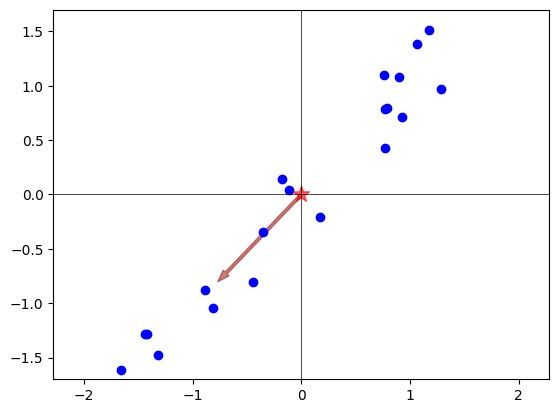

In [ ]:
fig = plt.figure(); ax = plt.gca()
ax.arrow(0, 0, vt[0, 0], vt[0, 1], width=0.025, color='brown', alpha=0.6)
plotX(X, ax)

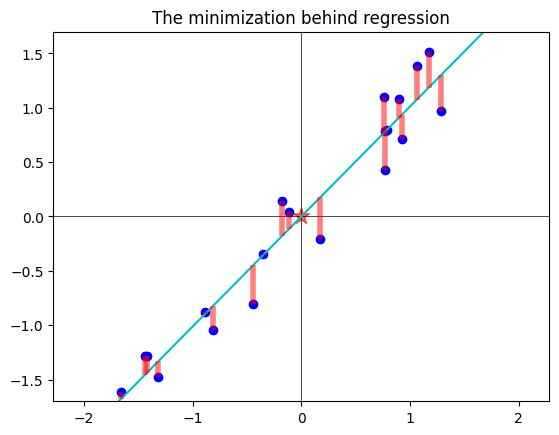

In [ ]:
def plot_reg(X, ax): # hypothesizing that f depends on x, perform regression
    x = X[:, 0]; f = X[:, 1]
    X1 = np.array([np.ones(X.shape[0]), x]).T
    a = np.linalg.inv(X1.T @ X1) @ X1.T @ f
    x_predict = np.linspace(-2, 2, num=100)
    f_predict = a[0] + a[1] * x_predict
    plotX(X, ax)
    ax.plot(x_predict, f_predict, 'c');
    fp = X1 @ a
    lc = LineCollection([[(x[i], f[i]), (x[i], fp[i])]
                        for i in range(len(x))],
                       color='r', linewidth=4, alpha=0.5)
    ax.add_collection(lc)
    ax.set_title('The minimization behind regression');
fig = plt.figure(); ax = plt.gca()
plot_reg(X, ax)

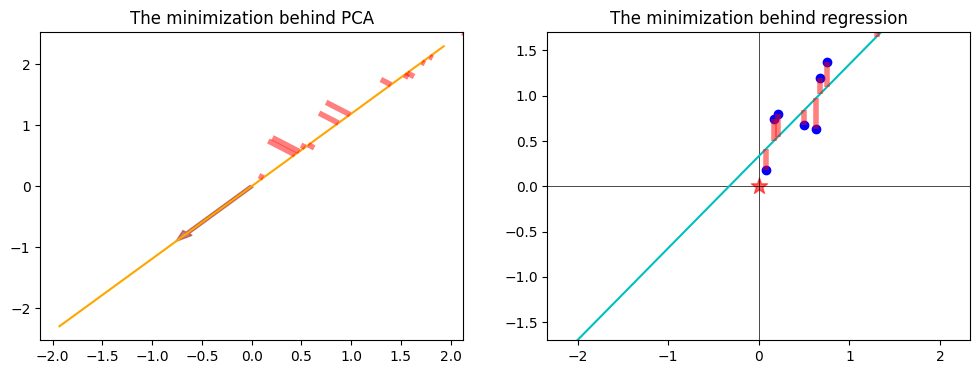

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from matplotlib.collections import LineCollection


def plot_pca(X, ax):
    u, s, vt = svd(X)
    t = np.linspace(-3, 3, 100)
    v1 = vt[0, :]
    ax.plot(t * v1[0], t * v1[1], color='orange')
    ax.arrow(0, 0, v1[0], v1[1], width=0.04, color='brown', alpha=0.6)
    Xp = v1[:, np.newaxis] * (X @ v1)
    lc = LineCollection([[(X[i, 0], X[i, 1]), (Xp[0, i], Xp[1, i])]
                         for i in range(X.shape[0])],
                        color='r', linewidth=4, alpha=0.5)
    ax.add_collection(lc)
    ax.set_title('The minimization behind PCA')


fig, (axl, axr) = plt.subplots(1, 2, figsize=(12, 4))

plot_pca(X, axl)

plot_reg(X, axr)
plt.show()

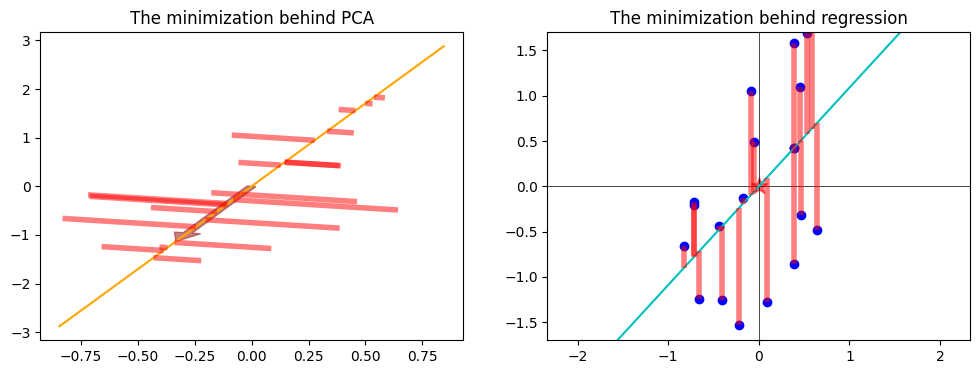

In [ ]:
rng = np.random.default_rng(13)
z0 = 1.5 * rng.random(20); z1 = z0 + 2.7 * rng.random(20)
ZZ = np.array([z0, z1 ]).T
Z = ZZ - ZZ.mean(axis=0)
fig = plt.figure(figsize=(12, 4))
axl, axr = fig.subplots(1, 2)
plot_pca(Z, axl); plot_reg(Z, axr)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(XX);
# fit with raw (uncentered) data

In [ ]:
pca.components_

array([[-0.69180966, -0.72207991],
       [ 0.72207991, -0.69180966]])

In [ ]:
vt

array([[-0.69180966, -0.72207991],
       [ 0.72207991, -0.69180966]])

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
XX = digits.data
X = XX - XX.mean(axis=0)
m, n = XX.shape; m, n

(1797, 64)

In [ ]:
pca = PCA(svd_solver='full').fit(XX)

In [ ]:

 u, s, vt = svd(X)

In [ ]:
norm(pca.singular_values_ - s)

0.0

In [ ]:
def vectors_plus_minus_diff(v1, v2):
    print('%2.1f %2.1f' %(norm(v1 - v2), norm(v1 + v2)))

In [ ]:
for i in range(7):
    vectors_plus_minus_diff(pca.components_[i, :], vt[i, :])

2.0 0.0
2.0 0.0
2.0 0.0
2.0 0.0
2.0 0.0
0.0 2.0
0.0 2.0


In [ ]:
# projected data from pca (can also use pca.fit_transform(XX)):
projX = pca.transform(XX)

In [ ]:
# projected data from svd:
us = u[:, :len(s)] @ np.diag(s)

In [ ]:
# check they are same upto a sign
for i in range(7):
    vectors_plus_minus_diff(projX[:, i], us[:, i])

1134.0 0.0
1084.5 0.0
1009.3 0.0
852.2 0.0
706.7 0.0
0.0 651.6
0.0 610.5


In [ ]:
l=5
Xl_svd = u[:, :l] @ np.diag(s[:l]) @ vt[:l, :] + XX.mean(axis=0)

In [ ]:
# The rank l approximation needs only l principal components
pcal = PCA(n_components=l, svd_solver='full').fit(XX)

In [ ]:
projX = pcal.transform(XX)
projX.shape # the shape reflects projected data sizes

(1797, 5)

In [ ]:
Xl_pca = pcal.inverse_transform(projX)
Xl_pca.shape # the shape is now the shape of original data

(1797, 64)

In [ ]:
norm(Xl_pca - Xl_svd) / norm(Xl_pca)

1.030318249814529e-15

In [ ]:
Xl_pca2 = projX @ pcal.components_ + pcal.mean_
norm(Xl_pca2 - Xl_pca)

0.0

In [ ]:
norm(pca.explained_variance_ - (s**2/(m-1)))

0.0

In [ ]:
norm(pca.explained_variance_ratio_ - (s**2)/(s**2).sum())

3.2998422865130236e-17

In [ ]:
ew, ev = np.linalg.eig(X.T @ X / (m-1)) # eigenvalues & eigenvectors of C
ii = ew.argsort()[::-1]
ew = ew[ii]; ev = ev[:, ii]
# sort by descending order of eigenvalues

In [ ]:
norm(ew - s**2 / (m-1)) # eigenvalues equal singular values squared /(m-1)

6.384198607757885e-13

In [ ]:
for i in range(7): # eigenvectors equal +/- principal components
    vectors_plus_minus_diff(pca.components_[i, :], ev[:, i])

2.0 0.0
2.0 0.0
2.0 0.0
0.0 2.0
2.0 0.0
0.0 2.0
0.0 2.0


In [ ]:
N = 4
eps = 1e-8
X = np.diag(eps * np.ones(N), k=-1)
X[0, :] = 1; X = X[:, :(N-1)]; X

array([[1.e+00, 1.e+00, 1.e+00],
       [1.e-08, 0.e+00, 0.e+00],
       [0.e+00, 1.e-08, 0.e+00],
       [0.e+00, 0.e+00, 1.e-08],
       [0.e+00, 0.e+00, 0.e+00]])

In [ ]:
ew, ev = np.linalg.eig(X.T @ X)
ii = ew.argsort()[::-1]; ev = ev[:, ii]; ew = ew[ii]
ew

array([ 3.00000000e+00,  0.00000000e+00, -2.22044605e-16])

In [ ]:
np.sqrt(ew)

<ipython-input-113-6f1372a76c3a>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(ew)


array([1.73205081, 0.        ,        nan])

In [ ]:
u,s, vt = svd(X)
s

array([1.73205081e+00, 1.00000000e-08, 1.00000000e-08])

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.images.shape, digits.data.shape

((1797, 8, 8), (1797, 64))

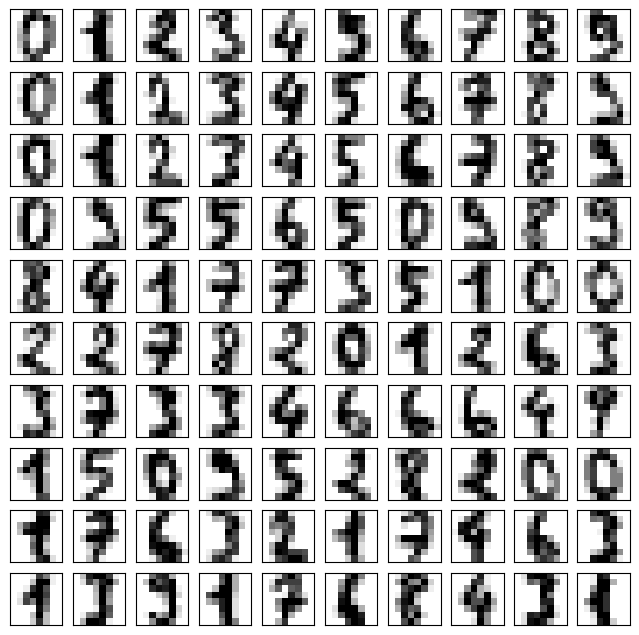

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')

In [ ]:
m, n = digits.data.shape
m, n

(1797, 64)

In [ ]:
pca = PCA(n_components=10).fit(digits.data)

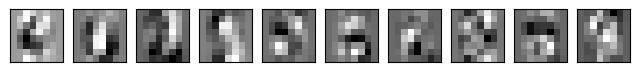

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(8, 4),
subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i, :].reshape(8, 8), cmap='binary')

In [ ]:
projdgt = pca.transform(digits.data)
projdgt.shape

(1797, 10)

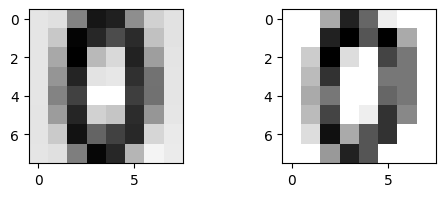

In [ ]:
fig = plt.figure(figsize=(6, 2))
axl, axr = fig.subplots(1, 2)
reconstructed_dgts = pca.inverse_transform(projdgt)
im0 = reconstructed_dgts[0, :]
# alternately and equivalently, we may set im0 by
# im0 = dgt[0, :] @ pca.components_ + pca.mean_
axl.imshow(im0.reshape(8, 8), cmap='binary')
axr.imshow(digits.images[0], cmap='binary');

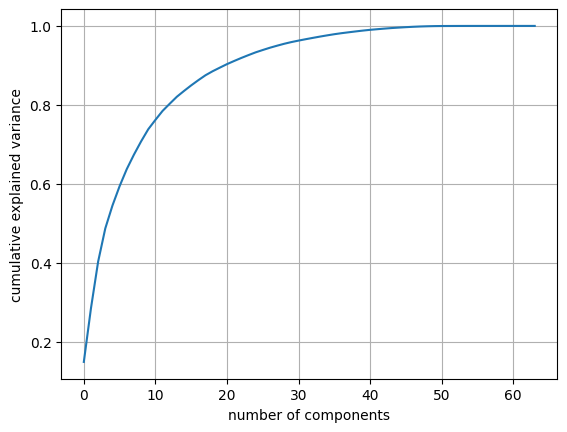

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)
plt.xlabel('number of components')

plt.ylabel('cumulative explained variance');

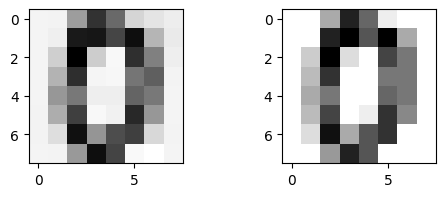

In [ ]:
pca = PCA(n_components=30).fit(digits.data)
dgt = pca.fit_transform(digits.data)
fig = plt.figure(figsize=(6, 2))
axl, axr = fig.subplots(1, 2)
im0 = dgt[0, :] @ pca.components_ + pca.mean_
axl.imshow(im0.reshape(8, 8), cmap='binary')
axr.imshow(digits.images[0], cmap='binary');